# **Air Quality Prediction Project 3**

## **1. Introduction**

**Goal:**  
The goal of this project is to build a regression model to predict the daily Air Quality Index (AQI) across different U.S. regions. AQI is a key indicator of air pollution, reflecting the level of harmful pollutants in the atmosphere such as particulate matter, ozone, and carbon monoxide. High AQI values can signal serious health risks, especially for vulnerable populations like children, the elderly, and those with respiratory conditions.

Being able to predict AQI based on available regional and environmental factors helps inform public health decisions, environmental policy, and community alerts. In this project, we focus on using only the data provided—such as location, pollutant type, and population characteristics—to explore how accurately we can estimate AQI without relying on external data sources.

**Research Question:**  
*How well can we predict daily Air Quality Index (AQI) across US regions using only the location, pollutant, and population data provided in this dataset?*

**Dataset Details:**  
The dataset used in this project contains daily air quality measurements from various regions across the United States. It includes key information such as the Air Quality Index (AQI), the most impactful pollutant on a given day, and details about the location where the data was recorded.

**Main Columns Include:**
- `CBSA Code`: A code representing a core-based statistical area defined by the U.S. Office of Management and Budget.
- `Date`: The specific day the air quality was recorded.
- `AQI`: The average Air Quality Index value for that day, ranging from 0 (healthy) to 500 (hazardous).
- `Category`: A qualitative label for the AQI value, such as "Good", "Moderate", or "Unhealthy".
- `Defining Parameter`: The primary pollutant contributing most to the AQI that day (e.g., PM2.5, Ozone, CO).
- `Number of Sites Reporting`: The number of monitoring stations contributing data for that entry.
- `city_ascii`, `state_id`, `state_name`: Identifiers for the city and state where the data was collected.
- `lat`, `lng`: Latitude and longitude of the data collection point.
- `population`: The population of the corresponding region.
- `density`: The population density (people per square kilometer).
- `timezone`: The time zone of the region.

**Data Sources:**
- **Locational Data**: [SimpleMaps US Cities Database](https://simplemaps.com/data/us-cities)
- **AQI Data**: [EPA Air Quality System (AQS) Data](https://aqs.epa.gov/aqsweb/airdata/download_files.html)
- For technical background on AQI: [EPA AQI Technical Document](https://www.airnow.gov/sites/default/files/2020-05/aqi-technical-assistance-document-sept2018.pdf)

The dataset was provided as a CSV file for this project. Upon initial inspection, it contains approximately _5617325_ rows and _15_ columns, covering a broad range of U.S. cities and dates.

## **2. What is Regression and How Does It Work?**

Regression is a type of supervised machine learning technique used to predict a continuous output variable (also called the target or response) based on one or more input features (also called independent variables). In this project, our goal is to predict the **Air Quality Index (AQI)**, which is a continuous numerical value, based on features like location, population, and pollutant data.

### **Linear Regression**

Linear regression is one of the simplest and most widely used forms of regression. It assumes a linear relationship between the input variables (features) and the output variable (target). The goal of linear regression is to find the best-fitting straight line (or hyperplane in higher dimensions) through the data points.

Mathematically, linear regression can be expressed as:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n + \epsilon
$$

Where:
- $ y $ is the predicted target (in our case, **AQI**),
- $ \beta_0 $ is the intercept,
- $ \beta_1, \beta_2, ..., \beta_n $ are the coefficients (weights) for each feature $ x_1, x_2, ..., x_n $,
- $ \epsilon $ is the error term (the difference between the predicted and actual values).

### **Ordinary Least Squares (OLS)**

The most common method for fitting a linear regression model is **Ordinary Least Squares**. OLS works by minimizing the **sum of squared residuals**—the vertical distances between the actual data points and the predicted line.

In simpler terms, the model adjusts the coefficients so that the total error between predicted and actual AQI values is as small as possible:

$$
\text{Minimize } \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Where:
- $y_i$ is the actual AQI value,
- $\hat{y}_i$ is the predicted AQI value from the model.

### **Why Linear Regression for This Project?**

I am starting with Linear Regression because:
- It's interpretable and simple to implement.
- It's effective for understanding which features (e.g., population, location, pollutant type) have the strongest linear relationship with AQI.
- It provides a baseline model that I can later improve with more complex algorithms like Random Forest or XGBoost.

Later in the project, I may explore alternative models to see if they perform better, but Linear Regression provides a solid foundation to start with.

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [70]:
# Load the dataset
df = pd.read_csv('US_AQI.csv')

df.head()

,Unnamed: 0,CBSA Code,Date,AQI,Category,Defining Parameter,Number of Sites Reporting,city_ascii,state_id,state_name,lat,lng,population,density,timezone
0,0,10140,2022-01-01,21,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
1,1,10140,2022-01-02,12,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
2,2,10140,2022-01-03,18,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
3,3,10140,2022-01-04,19,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
4,4,10140,2022-01-05,17,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles


## **Data Understanding**

### **Exploratory Data Analysis (EDA)**

Before building our regression model, it's important to explore and understand the structure, quality, and contents of the dataset. We'll start by checking the dataset's structure, identifying any missing values, and drawing some early observations that will help guide preprocessing and modeling decisions.

#### **Dataset Structure**

Let’s examine the size of the dataset, the data types of each column, and whether the data types align with their intended meaning.

In [71]:
# Overview of dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5617325 entries, 0 to 5617324
Data columns (total 15 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Unnamed: 0                 int64  
 1   CBSA Code                  int64  
 2   Date                       object 
 3   AQI                        int64  
 4   Category                   object 
 5   Defining Parameter         object 
 6   Number of Sites Reporting  int64  
 7   city_ascii                 object 
 8   state_id                   object 
 9   state_name                 object 
 10  lat                        float64
 11  lng                        float64
 12  population                 float64
 13  density                    float64
 14  timezone                   object 
dtypes: float64(4), int64(4), object(7)
memory usage: 642.9+ MB


- The dataset contains **5,617,325 rows** and **15 columns**, making it a large and rich dataset with wide coverage across different locations and dates.
- It includes a mix of:
  - **Numerical columns**: `CBSA Code`, `AQI`, `Number of Sites Reporting`, `lat`, `lng`, `population`, `density`, and `Unnamed: 0`.
  - **Categorical/text columns**: `Date`, `Category`, `Defining Parameter`, `city_ascii`, `state_id`, `state_name`, and `timezone`.

The `Date` column is currently of type `object`, so we may want to convert it to datetime format later for time-based feature engineering.

#### **Missing Values**

We’ll check for missing or null values in the dataset. This will help us decide whether any cleaning or imputation is needed before modeling.

In [72]:
# Count of missing values in each column
df.isnull().sum()

Unnamed: 0                   0
CBSA Code                    0
Date                         0
AQI                          0
Category                     0
Defining Parameter           0
Number of Sites Reporting    0
city_ascii                   0
state_id                     0
state_name                   0
lat                          0
lng                          0
population                   0
density                      0
timezone                     0
dtype: int64

- There are **no missing values** in the dataset. Every column has a complete set of data, which simplifies our preprocessing and modeling pipeline.

#### **Initial Observations**

From my early checks, I’ve identified a few important notes:
- We have several potential predictors for AQI, including:
  - **Geographic features**: `lat`, `lng`, `state_name`, `city_ascii`
  - **Population features**: `population`, `density`
  - **Pollution-related info**: `Defining Parameter`, `Number of Sites Reporting`
- The `Date` column should be converted to datetime to allow for extraction of month, season, or other time-based trends.
- The `Unnamed: 0` column appears to be just an index from the original CSV file and can likely be dropped.

These observations will help to prepare the data effectively before fitting the first regression model.

In [73]:
df.head()

,Unnamed: 0,CBSA Code,Date,AQI,Category,Defining Parameter,Number of Sites Reporting,city_ascii,state_id,state_name,lat,lng,population,density,timezone
0,0,10140,2022-01-01,21,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
1,1,10140,2022-01-02,12,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
2,2,10140,2022-01-03,18,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
3,3,10140,2022-01-04,19,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
4,4,10140,2022-01-05,17,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles


#### **Unique Categories**

In [74]:
categories = df['Category'].unique()
categories

array(['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy',
       'Hazardous', 'Very Unhealthy'], dtype=object)

#### **Distribution of AQI**
A histogram of the `AQI` column will help us understand the overall distribution of air quality values across all locations and dates.

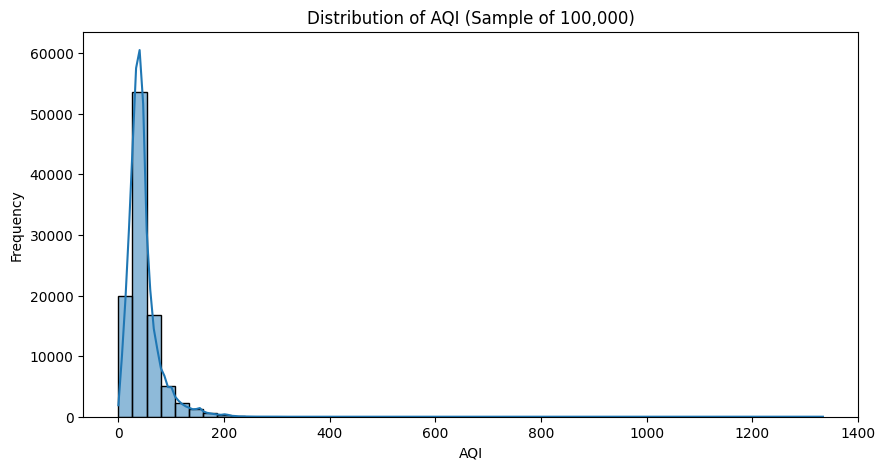

In [75]:
# Take a smaller random sample of, say, 100,000 rows
sample_df = df.sample(100000, random_state=42)

plt.figure(figsize=(10, 5))
sns.histplot(sample_df['AQI'], bins=50, kde=True)
plt.title('Distribution of AQI (Sample of 100,000)')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()

**Distribution Findings**  
- From the histogram, we see that the vast majority of AQI values cluster at the lower end (under ~50), with a long tail extending to higher AQI values. This suggests that “Good” air quality is most common, but some locations or dates do experience significantly higher pollution levels.

**Why Sampling?**  
- Because the dataset contains over 5.6 million rows, plotting all data at once can be slow and visually overwhelming. By taking a random sample of 100,000 observations, we preserve the overall distribution pattern while improving performance and clarity of the visualization.

#### **Correlation Heatmap**
We'll calculate and visualize correlation among all numerical columns. This can help us identify which features are most related to AQI.

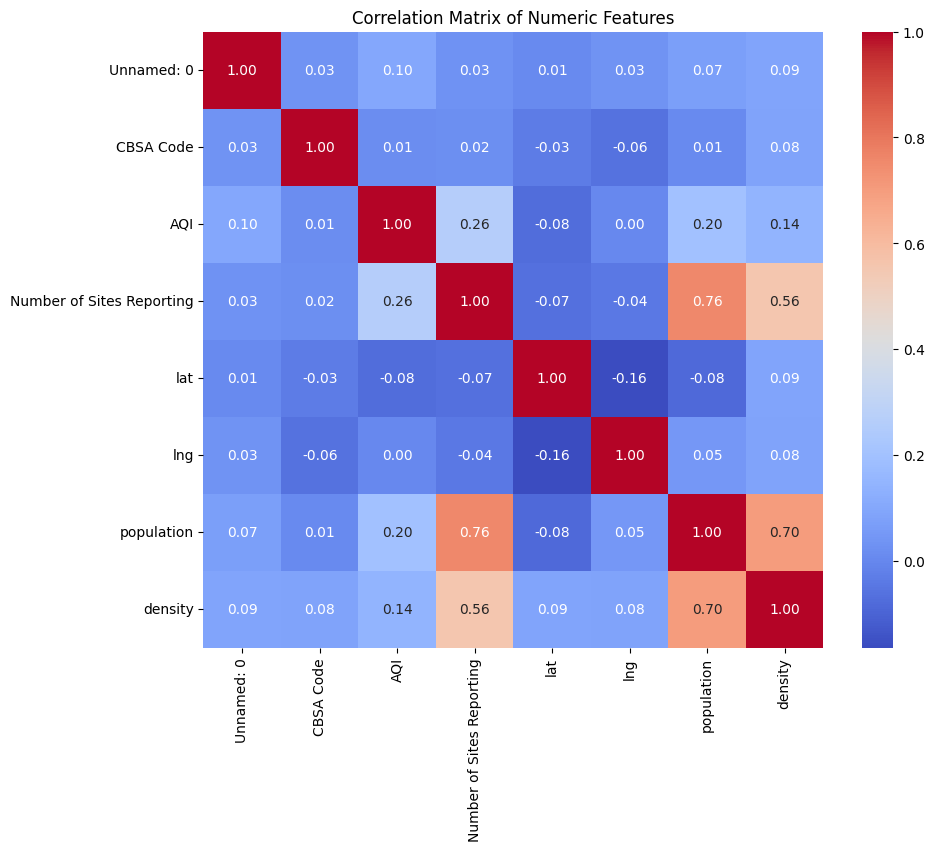

In [76]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_cols.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

**Key Observations from the Correlation Heatmap:**
- **Number of Sites Reporting** shows a strong positive correlation with both **Population (0.76)** and **Density (0.56)**. This suggests more densely populated regions tend to have more monitoring stations.
- **Population** and **Density** also have a high positive correlation **(0.70)**, which is expected since larger populations in the same geographic area naturally increase population density.
- **AQI** shows only mild-to-moderate correlations with **Population (0.20)** and **Number of Sites Reporting (0.26)**, indicating that while more populated or closely monitored areas may have slightly different air quality, it’s not the dominant factor driving AQI across the dataset.

#### **Concluding the EDA and Moving Forward**

From the correlation analysis, you can see which numeric features show stronger relationships with one another (e.g., population, density, and number of sites). Although AQI does not strongly correlate with most features, these observations guide us in deciding which variables might be worth exploring or transforming for the model.

In the next section, I'll leverage these insights to:
1. **Handle any necessary data transformations** (e.g., converting categorical columns to numeric, scaling large-range features).
2. **Drop or reformat** columns that won't add value to our regression model.
3. **Engineer potential new features** (e.g., extracting `month` from `Date`) to capture time-based patterns.

By preparing a clean, model-ready dataset, we'll be better positioned for accurate AQI predictions in the modeling phase.

## **3. Experiment 1: Linear Regression**

### **3.2 Pre-Processing**

To prepare the data for modeling, we completed several preprocessing steps:

1. **Converted `Date` to datetime** format using `pd.to_datetime`. This allowed me to later extract temporal features such as month or season that may influence air quality trends. This allowed us to later extract temporal features such as `month` or `season` that may influence air quality trends.
2. **Dropped unnecessary columns** that do not provide predictive value or are redundant:
   - `Unnamed: 0`: an index column from the original CSV.
   - `city_ascii`, `state_id`, `state_name`, `timezone`: mostly string-based geographic labels already represented by latitude and longitude or too granular for modeling.

In [77]:
# Convert 'Date' to Datetime and drop 'Unnamed' column
df['Date'] = pd.to_datetime(df['Date'])     
df.drop(columns=['Unnamed: 0'], inplace=True)

# Columns to drop
columns_to_drop = ['city_ascii', 'state_id', 'state_name', 'timezone']
df.drop(columns=columns_to_drop, inplace=True)

# Confirm that the columns are removed
df.head()

,CBSA Code,Date,AQI,Category,Defining Parameter,Number of Sites Reporting,lat,lng,population,density
0,10140,2022-01-01,21,Good,PM2.5,2,46.9757,-123.8094,16571.0,588.0
1,10140,2022-01-02,12,Good,PM2.5,2,46.9757,-123.8094,16571.0,588.0
2,10140,2022-01-03,18,Good,PM2.5,2,46.9757,-123.8094,16571.0,588.0
3,10140,2022-01-04,19,Good,PM2.5,2,46.9757,-123.8094,16571.0,588.0
4,10140,2022-01-05,17,Good,PM2.5,2,46.9757,-123.8094,16571.0,588.0


3. **Handled categorical features**: For our initial experiment, we used `Defining Parameter` (the main pollutant contributing to the AQI) and planned to one-hot encode it later during modeling.
4. **Verified data types and completeness**: No major missing data was observed for the columns selected in the initial model (`lat`, `lng`, `Defining Parameter`, `population`, `density`, `Number of Sites Reporting`), allowing us to proceed without imputation for this version.

### **3.3 Modeling**

For our first modeling attempt, we used a Linear Regression model to predict AQI using the following features:

- `lat` and `lng` — to represent geographic location
- `population` and `density` — to account for urbanization levels
- `Defining Parameter` — the main pollutant contributing to AQI (categorical)
- `Number of Sites Reporting` — indicating the scale of air quality monitoring
- `month` — extracted from the `Date` column to capture seasonal patterns

We also performed one-hot encoding on the `Defining Parameter` feature during preprocessing within a modeling pipeline.

#### **Feature Engineering**

First, we extracted the `month` feature from the `Date` column:

In [78]:
df['month'] = df['Date'].dt.month

Next, we prepared our data for modeling:

In [79]:
# Select features and target
X = df[['lat', 'lng', 'population', 'density', 'Number of Sites Reporting', 'Defining Parameter', 'month']]
y = df['AQI']

# Categorical features to encode
categorical_features = ['Defining Parameter']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Keep numeric features as is
)

# Create full pipeline with Linear Regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Experiment 1 RMSE: {rmse:.2f}")

Experiment 1 RMSE: 34.53


### **3.4 Evaluation**

This Linear Regression model gave us a baseline **Root Mean Squared Error (RMSE)** of approximately **34.53**. While this is a good starting point, it suggests that a simple linear model may not fully capture the complexity of air quality variation across regions and time. In the next experiments, we’ll explore more advanced models and additional feature engineering to improve performance.

## **4. Experiment 2: Ridge Regression**

In Experiment 2, we aimed to improve our model by addressing two potential issues with the first approach:
1. **Multicollinearity**: Features like `population`, `density`, and `Number of Sites Reporting` may be correlated. This can lead to unstable coefficients in Linear Regression.
2. **Lack of regularization**: Linear Regression has no built-in mechanism to constrain or shrink coefficients, which may lead to overfitting or high variance in prediction.

To mitigate these issues, we introduced two changes:
- Switched from **Linear Regression** to **Ridge Regression**, which applies L2 regularization.
- Added a new interaction feature: `population × density`, under the assumption that the effect of a dense population might not be linear.

### **4.1 Feature Engineering**
We created a new feature that multiplies population and density:

In [80]:
df['pop_density_interaction'] = df['population'] * df['density']

Our new feature set includes:
- All features from Experiment 1
- The new `pop_density_interaction` term

### **4.2 Modeling**

In [81]:
# Preprocessor with scaling for numeric features
numeric_features = ['lat', 'lng', 'population', 'density', 'Number of Sites Reporting', 'month', 'pop_density_interaction']
categorical_features = ['Defining Parameter']

from sklearn.compose import make_column_transformer

preprocessor = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), categorical_features),
    (StandardScaler(), numeric_features)
)

# Same train/test split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))
])

# Train and evaluate
ridge_pipeline.fit(X2_train, y2_train)
y2_pred = ridge_pipeline.predict(X2_test)
rmse2 = np.sqrt(mean_squared_error(y2_test, y2_pred))
print(f"Experiment 2 RMSE (Ridge): {rmse2:.2f}")

Experiment 2 RMSE (Ridge): 34.42


### **4.3 Evaluation**

With Ridge Regression and the additional `population × density` interaction feature, the model achieved an RMSE of **34.42**, slightly **worse** than the baseline Linear Regression model's RMSE of 34.53.

This result suggests a few possibilities:
- Regularization wasn’t helpful in this case — the base linear model may not have been overfitting significantly to begin with.
- The added interaction feature may not provide meaningful predictive value or may be introducing additional noise.
- Ridge can sometimes underperform when the signal is already strong and most features are relevant.

In short, this experiment shows that **not all complexity leads to better performance**, and that **Ridge Regression isn’t always better** than plain linear regression — especially when data is well-behaved or doesn’t have severe multicollinearity.

This motivates our next step: trying a **nonlinear model** that can potentially capture more complex patterns in AQI behavior that linear methods can’t.

## **5. Experiment 3: Random Forest Regression**

In our final experiment, we shifted to a **nonlinear regression model** — the **Random Forest Regressor** — to better capture complex patterns in the data.

Unlike linear models, Random Forests:
- **Do not assume a linear relationship** between inputs and the target
- Can handle **interactions between features** automatically
- Are **robust to outliers** and capable of modeling sharp thresholds (e.g., sudden AQI jumps due to pollution spikes)

We kept all features from Experiment 2, including the `pop_density_interaction` term, and used the same preprocessing pipeline.

### **5.1 Modeling**

In [88]:
from sklearn.ensemble import RandomForestRegressor

# Downsample first
df_sampled = df.sample(n=500_000, random_state=42)

# Use same features as before
X3 = df_sampled[['lat', 'lng', 'population', 'density', 'Number of Sites Reporting', 
         'Defining Parameter', 'month', 'pop_density_interaction']]
y3 = df_sampled['AQI']

# Split data
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Create pipeline with preprocessing and model
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # includes OneHotEncoder + StandardScaler
    ('regressor', RandomForestRegressor(n_estimators=20, max_depth=10, random_state=42, n_jobs=-1))
])

# Train and evaluate
rf_pipeline.fit(X3_train, y3_train)
y3_pred = rf_pipeline.predict(X3_test)
rmse3 = np.sqrt(mean_squared_error(y3_test, y3_pred))
print(f"Experiment 3 RMSE (Random Forest): {rmse3:.2f}")

Experiment 3 RMSE (Random Forest): 30.82


### **5.2 Evaluation**

After fitting on a sampled subset of data, we achieved an RMSE of **30.82**, a notable improvement over:
- **Experiment 1 (Linear Regression):** 34.53
- **Experiment 2 (Ridge Regression):** 34.42

This improvement indicates that random forests capture AQI’s complex patterns and interactions more effectively than linear methods.

## **Impact**

Accurately predicting AQI can have far-reaching social and ethical impacts:

**Public Health:** Reliable AQI forecasts are crucial for at-risk populations—such as individuals with respiratory conditions—who rely on timely alerts to adjust their activities or medication. However, these forecasts might fail in under-reported areas due to inconsistent data collection, potentially leaving some communities more vulnerable.

**Data Bias & Representation:** If certain regions (e.g., rural or economically disadvantaged) have fewer monitoring sites or incomplete records, the model may underperform there, reinforcing health disparities. Over time, relying solely on predictive models without improving data quality in underrepresented areas could exacerbate inequality.

**Environmental Policy:** Policymakers might use AQI models to allocate funding or enforce regulations (e.g., industrial emissions standards). Overreliance on a single model or dataset could lead to misguided policies if the underlying data is skewed toward well-monitored regions. This underscores the need for transparency and domain expertise when interpreting AI-driven insights.

**Privacy Concerns:** While our dataset primarily deals with aggregated public information, future expansions (e.g., private health or location data) could raise questions about privacy. The greater the granularity of data, the more potential there is for identifying individuals or sensitive communities inadvertently.

In summary, while AQI prediction can greatly benefit public health and environmental decision-making, careful consideration of data representation, algorithmic bias, and privacy safeguards is necessary to ensure that these benefits are shared **equitably** and **responsibly**.

## **7. Conclusion**

This project set out to predict **daily AQI** using geographic, pollutant, and population-based features. Our work demonstrates the value of systematically testing **multiple regression approaches**:

- **Linear Regression** offered a straightforward baseline (RMSE: 34.53), confirming that some predictive signal exists in our chosen features.
- **Ridge Regression** (RMSE: 34.42) showed minimal improvement, suggesting that simple regularization and an interaction term did not address the complexities in AQI prediction.
- **Random Forest Regression** (RMSE: 30.82) provided the best results, capturing nonlinear relationships and feature interactions that linear models overlooked.

These experiments highlight the **iterative nature** of data science: initial baseline models expose possible improvements, while more advanced techniques like ensembles often outperform simpler linear approaches. Overall, we found that **nonlinear methods** better represent the real-world complexity of air quality data. Future efforts might explore other tree-based models or integrate additional external factors (e.g., meteorological or land-use data) to further refine AQI forecasts.

## References

Dataset: https://www.kaggle.com/datasets/calebreigada/us-air-quality-1980present